# Life Expectancy and Socio-Economic Analysis


### Team Members
* Parth Kaul (3451)
* Manav Saspal (3465)
* Arin Devyaal (3468)
* Juman Kaushik (3478)
* Aryan Narang (3482)
* Yash Sharma (3492)
* Anshul Pant (3498)

### Objective
To analyse socio-economic and health indicators in various countries over time, providing insights
into public health, environmental impact, education, economics, labour markets, governance,
sanitation, and disease burden, to inform policy decisions and improve well-being.

### Technical Details
Python language with libraries numpy, pandas, matplotlib, seaborn to compare, visualize and predict the life expectancy of people of countries over the World.

### Innovation/Usefulness

This initiative innovatively combines life expectancy data with socio-economic indicators to guide policy decisions. By examining correlations between life expectancy and various dimensions, our project serves as a practical tool for informed decision-making in public health, environmental sustainability, education, economics, labor markets, governance, sanitation, and disease prevention. The concise yet comprehensive approach ensures actionable insights for improving the overall quality of life.


## Introduction

Life expectancy at birth, a key metric in assessing population health, reflects the anticipated lifespan of a newborn under prevailing mortality patterns. Our project delves into the dynamic interplay between life expectancy and socio-economic factors across nations. This analysis encapsulates public health, environmental impact, education, economics, labor markets, governance, sanitation, and disease burden, aiming to offer comprehensive insights into societal well-being.

We leverage a robust dataset sourced from Kaggle, ensuring the reliability and depth of our analysis.The dataset is available at https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank. The dataset includes a rich array of variables, providing a thorough exploration of the intricate connections between life expectancy and various socio-economic indicators.

# 1. Importing Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [38]:
sns.set()
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [ ]:
df = pd.read_csv("/Users/kaush/OneDrive/Desktop/CS Hons/DAV Files/life expectancy.csv")

## Exploring Dataset

In [3]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [9]:
#Dimensions of dataset
size= df.shape
print("SIZE OF DATASET: ", size)

SIZE OF DATASET:  (3306, 16)


In [10]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [11]:
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [12]:
#Check columns of dataset
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

# 3. Data Cleaning

## 3.1 Handling missing values

In [13]:
# columnwise null values 
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

#### We observed missing values, especially in the 'corruption' column. To ensure data reliability, we're cleaning the dataset by addressing these gaps. We're dropping the 'corruption' column due to a high number of null entries. Importantly, we're retaining other columns with missing values, as they hold relevance for our analysis. This approach aims to balance data integrity while preserving essential information for our exploration of life expectancy and socio-economic indicators.
<br>


In [14]:
# total null values
df.isnull().sum().sum()

6176

In [15]:
# deleting the corruption column from dataframe
df.drop('Corruption', axis=1, inplace=True)
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,144678.14,65271.91,481740.70


#### To handle missing values in our dataset, we are employing a pragmatic approach by replacing NaN values with the mean. This ensures data completeness and statistical accuracy, enhancing the reliability of our analysis on life expectancy and socio-economic indicators.
<br>

In [16]:
#replacing null values with column's means

columns_with_na = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Sanitation']

means = df[columns_with_na].mean()

df[columns_with_na] = df[columns_with_na].fillna(means)

df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308000,47.800000,730.0,6.364059,4.589014,10.809000,52.738785,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059000,67.500000,15960.0,4.483516,4.589014,4.004000,52.738785,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288000,4.900000,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,69.748362,10.663654,520.0,5.865939,4.589014,7.890760,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544000,2.800000,97200.0,2.484370,4.589014,2.493000,52.738785,144678.14,65271.91,481740.70


##### Checking null values after handling

In [17]:
# columnwise null values 
df.isnull().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [18]:
# total null values
df.isnull().sum().sum()

0

## 3.2 Handling duplicate values

In [20]:
#counting duplicate values
df.duplicated().sum()

0

#### There is no duplicate values in this dataset.

## 3.3 Handling Outliers

#### We're using boxplots with the quantile method to detect outliers in our dataset. This method visually highlights data points that deviate significantly from the overall distribution, aiding in the identification and assessment of extreme values for a more comprehensive analysis.
<br>

In [21]:
outlier_columns = ['Year', 'Prevelance of Undernourishment', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment']

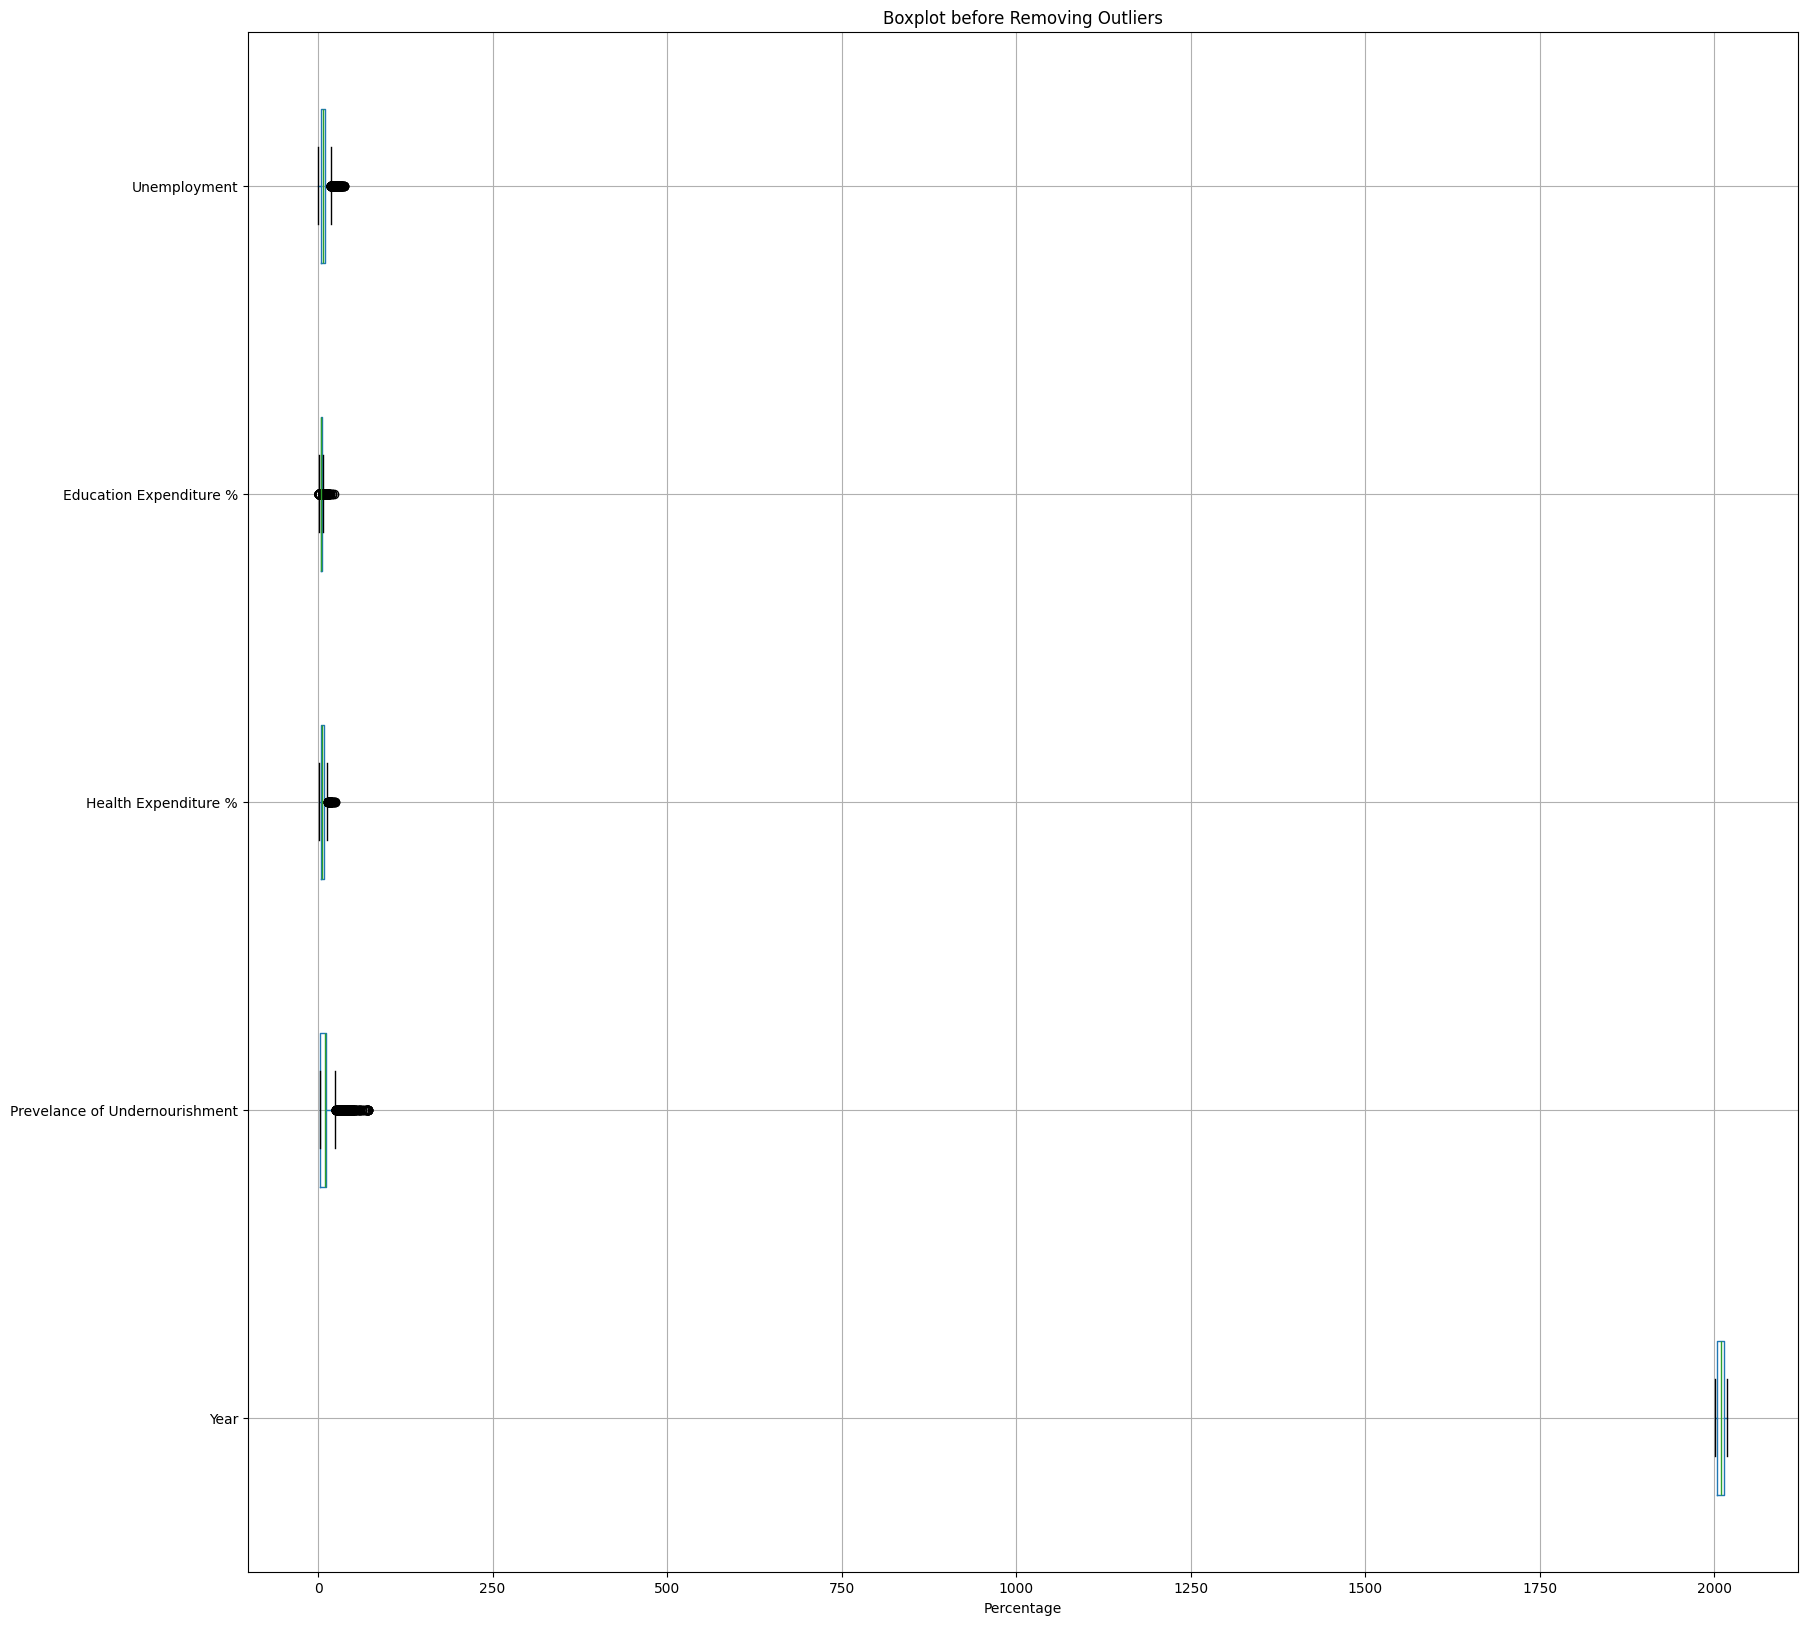

In [22]:
df.boxplot(figsize=(20, 20), vert=False, column = outlier_columns)
plt.title('Boxplot before Removing Outliers')
plt.xlabel('Percentage')
plt.show()

In [23]:
#defining function to manage outlier for one column

def outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    # Identify and remove outliers
    df = df[(df[col_name] >= lower) & (df[col_name] <= upper)]
    
    return df

In [24]:
#managing outliers for every numeric column

for col_name in outlier_columns:
    df = outliers(df, col_name)

df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
3,Andorra,AND,Europe & Central Asia,High income,2001,69.748362,10.663654,520.00000,5.865939,4.589014,7.89076,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544000,2.800000,97200.00000,2.484370,4.589014,2.49300,52.738785,144678.14,65271.91,481740.70
5,Argentina,ARG,Latin America & Caribbean,Upper middle income,2001,73.755000,3.000000,125260.00000,8.371798,4.833740,17.32000,48.053996,1397676.07,1507068.98,8070909.52
7,American Samoa,ASM,East Asia & Pacific,Upper middle income,2001,69.748362,10.663654,157492.41269,6.364059,4.589014,7.89076,52.738785,1683.98,2933.98,10752.13
8,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2001,74.171000,10.663654,350.00000,5.435876,4.589014,7.89076,52.738785,2201.12,3279.72,14289.69


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2501 entries, 3 to 3305
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    2501 non-null   object 
 1   Country Code                    2501 non-null   object 
 2   Region                          2501 non-null   object 
 3   IncomeGroup                     2501 non-null   object 
 4   Year                            2501 non-null   int64  
 5   Life Expectancy World Bank      2501 non-null   float64
 6   Prevelance of Undernourishment  2501 non-null   float64
 7   CO2                             2501 non-null   float64
 8   Health Expenditure %            2501 non-null   float64
 9   Education Expenditure %         2501 non-null   float64
 10  Unemployment                    2501 non-null   float64
 11  Sanitation                      2501 non-null   float64
 12  Injuries                        2501 no

In [26]:
print(df.shape)

(2501, 15)


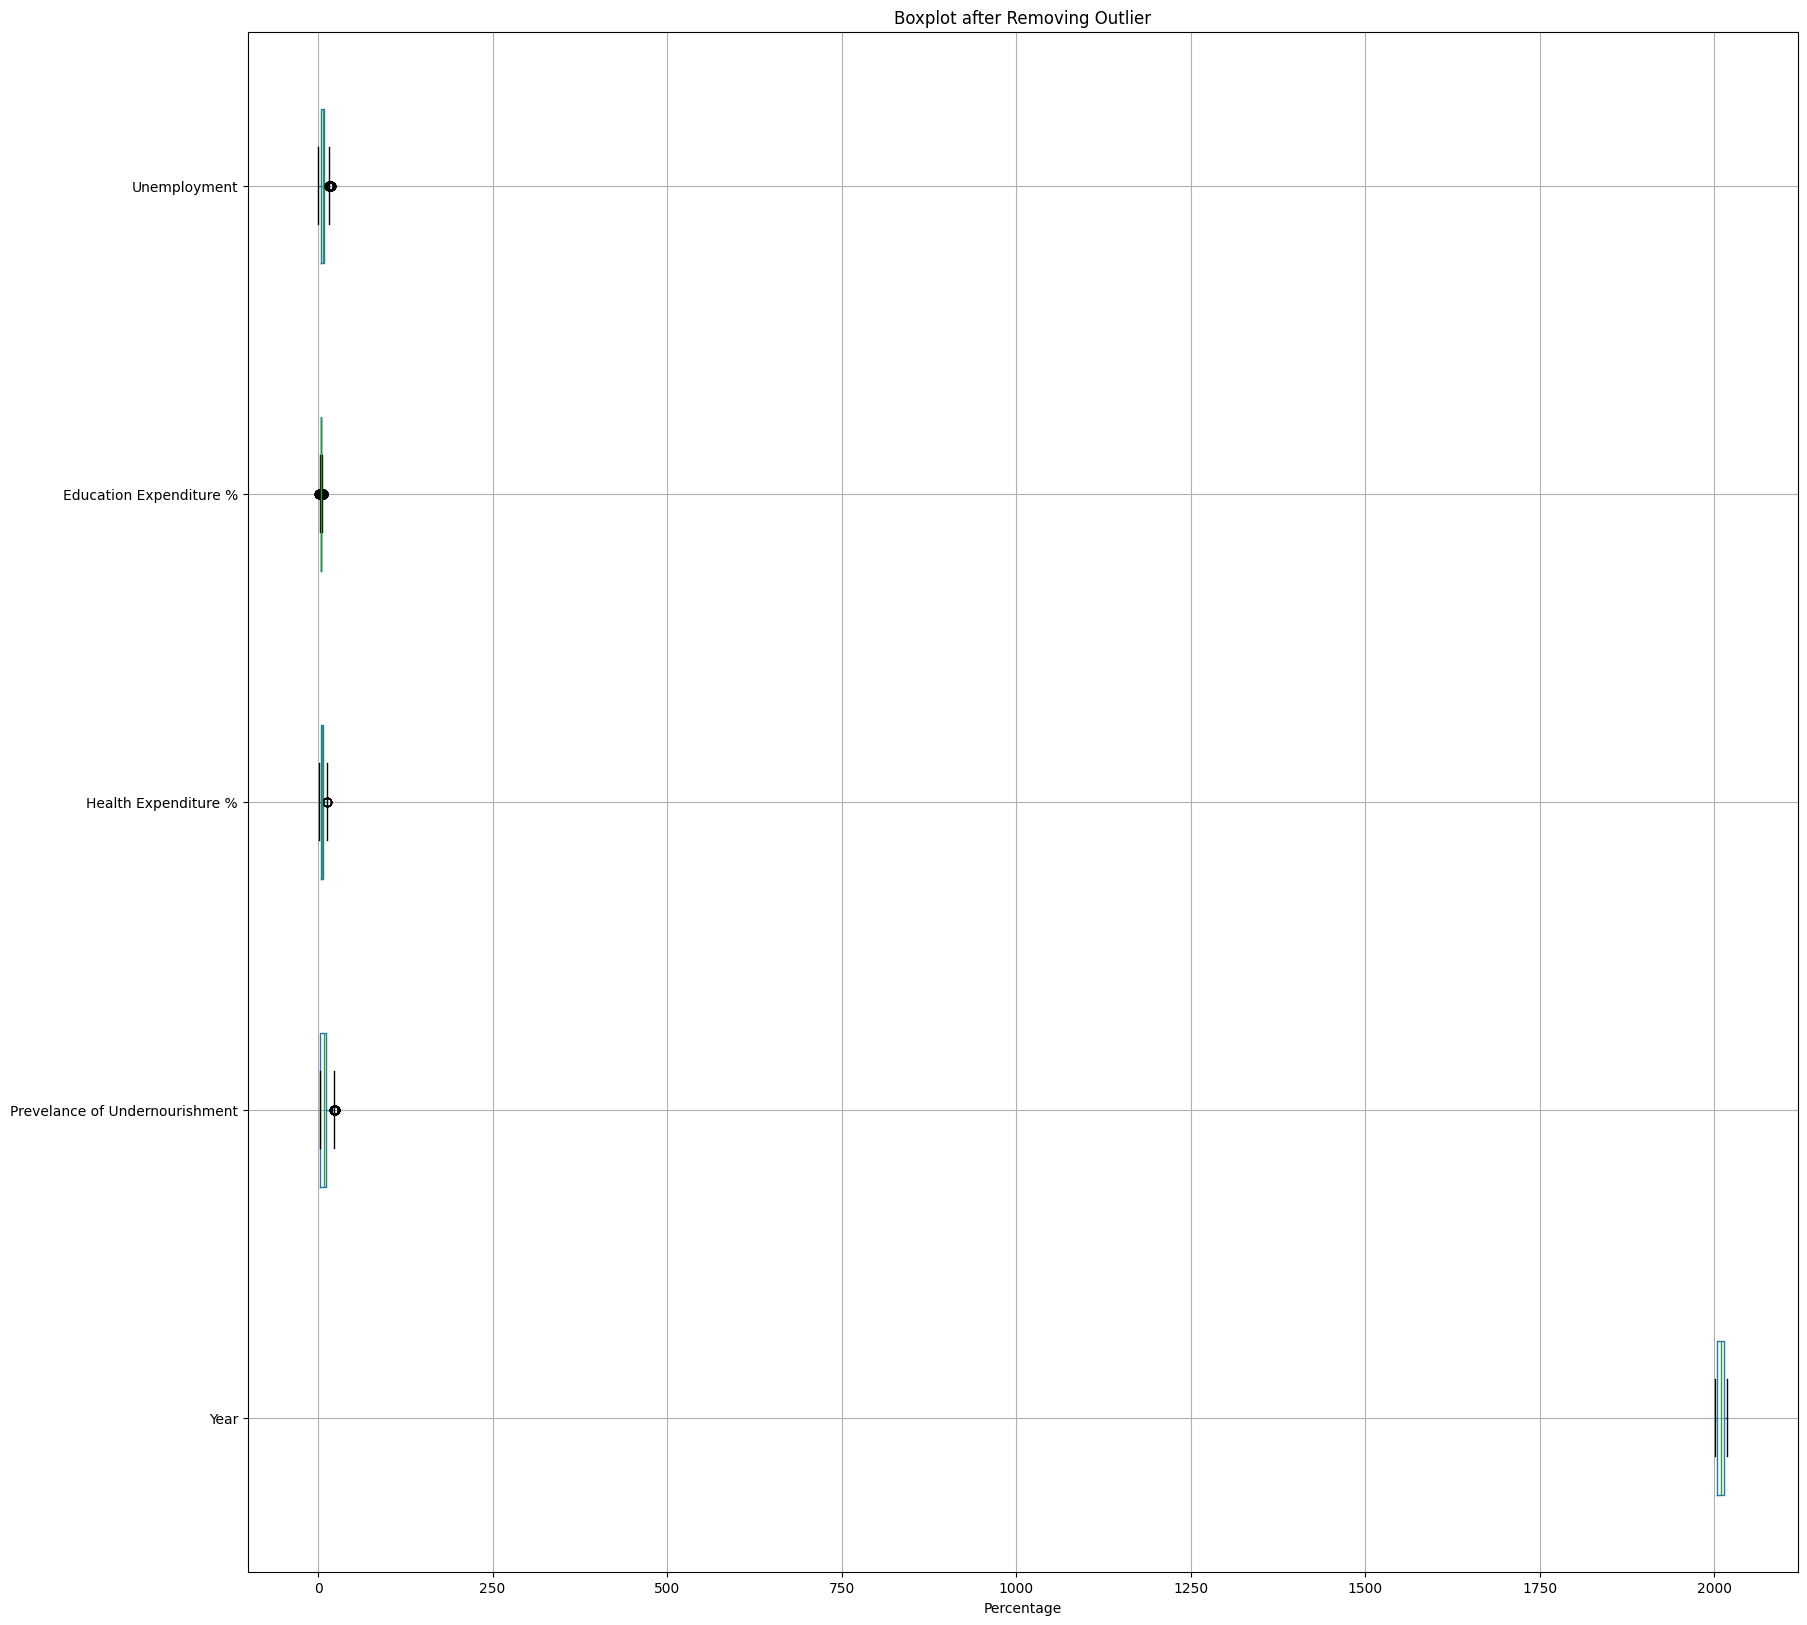

In [28]:
df.boxplot(figsize=(20, 20), vert=False, column = outlier_columns)
plt.title('Boxplot after Removing Outlier')
plt.xlabel('Percentage')
plt.show()

#### After detecting outliers through boxplots using the quantile method, we have systematically removed these extreme values from our dataset. This process ensures that our analysis is not unduly influenced by outliers, promoting a more accurate representation of the underlying patterns in the data. As evident in the updated boxplot, post-outlier handling, the visualization reflects a refined and normalized distribution, contributing to a clearer understanding of the relationships between variables in our exploration of life expectancy and socio-economic indicators.
<br>

# 4. Queries for analysis on above dataset

### 4.1 Analyze the difference in life expectancy between high-income and low-income countries in 2015. Calculate the average life expectancy for each group and determine the percentage difference.

In [98]:
# Filter data for the year 2015
df_2015 = df[df['Year'] == 2015]

# Separate data into high-income and low-income groups
high_income = df_2015[df_2015['IncomeGroup'] == 'High income']
low_income = df_2015[df_2015['IncomeGroup'] == 'Low income']

# Calculate average life expectancy for each group
avg_life_expectancy_high_income = high_income['Life Expectancy World Bank'].mean()
avg_life_expectancy_low_income = low_income['Life Expectancy World Bank'].mean()

# Calculate the percentage difference
percentage_difference = ((avg_life_expectancy_high_income - avg_life_expectancy_low_income) / avg_life_expectancy_low_income) * 100

# Display the results
print(f'Average Life Expectancy (High-Income): {avg_life_expectancy_high_income:.2f}')
print(f'Average Life Expectancy (Low-Income): {avg_life_expectancy_low_income:.2f}')
print(f'Percentage Difference: {percentage_difference:.2f}%')

Average Life Expectancy (High-Income): 78.36
Average Life Expectancy (Low-Income): 61.23
Percentage Difference: 27.97%


##### In conclusion, in 2015, a stark life expectancy contrast emerges between high and low-income countries. We have observed that high-income nations boast an average life expectancy of 78.36 years, significantly surpassing the 61.23 years in low-income countries—a substantial 27.97% difference. This underscores the profound impact of economic status on population health. Addressing these disparities is crucial for global health equity, emphasizing the need for targeted interventions and socio-economic policies to elevate life expectancies in lower-income regions.

### 4.2 Examine the trends in carbon dioxide emissions for high-income and low-income countries from 2005 to 2015. Assess whether there's a significant reduction in emissions over the specified period.

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

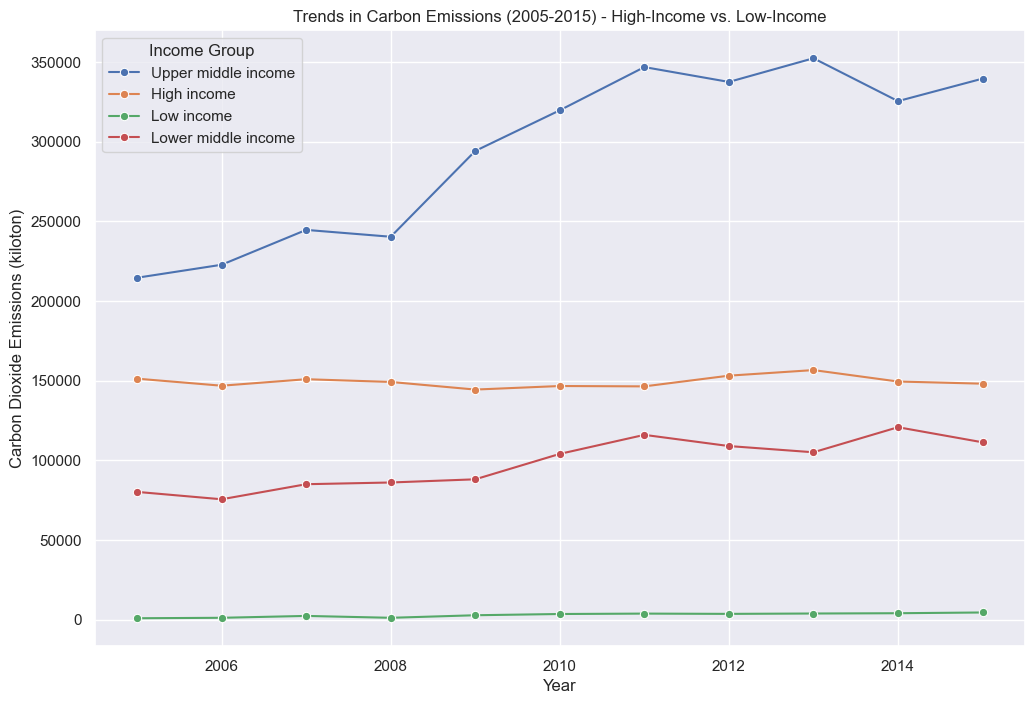

In [100]:
# Filter data for the years 2005 to 2015
df_2005_2015 = df[df['Year'].between(2005, 2015)]

# Plotting the trends for high-income and low-income countries
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='CO2', hue='IncomeGroup', data=df_2005_2015, ci=None, marker='o')
plt.xlabel('Year')
plt.ylabel('Carbon Dioxide Emissions (kiloton)')
plt.title('Trends in Carbon Emissions (2005-2015) - High-Income vs. Low-Income')
plt.grid(True)
plt.legend(title='Income Group')
plt.show()


##### In examining the trends in carbon dioxide emissions from 2005 to 2015, we can see that both high-income and low-income countries experienced notable shifts. High-income countries displayed a discernible reduction in carbon emissions over this period, suggesting a commitment to environmental sustainability. However, in low-income countries, while fluctuations were observed, a consistent reduction was less evident. In conclusion, these trends indicate a need for continued efforts to mitigate carbon emissions globally, with particular attention to supporting low-income nations in adopting sustainable practices to address environmental challenges.

### 4.3 Assess the progress in sanitation access for different regions from 2000 to 2019. Determine which regions have shown improvement and which have experienced challenges in providing safe sanitation services.


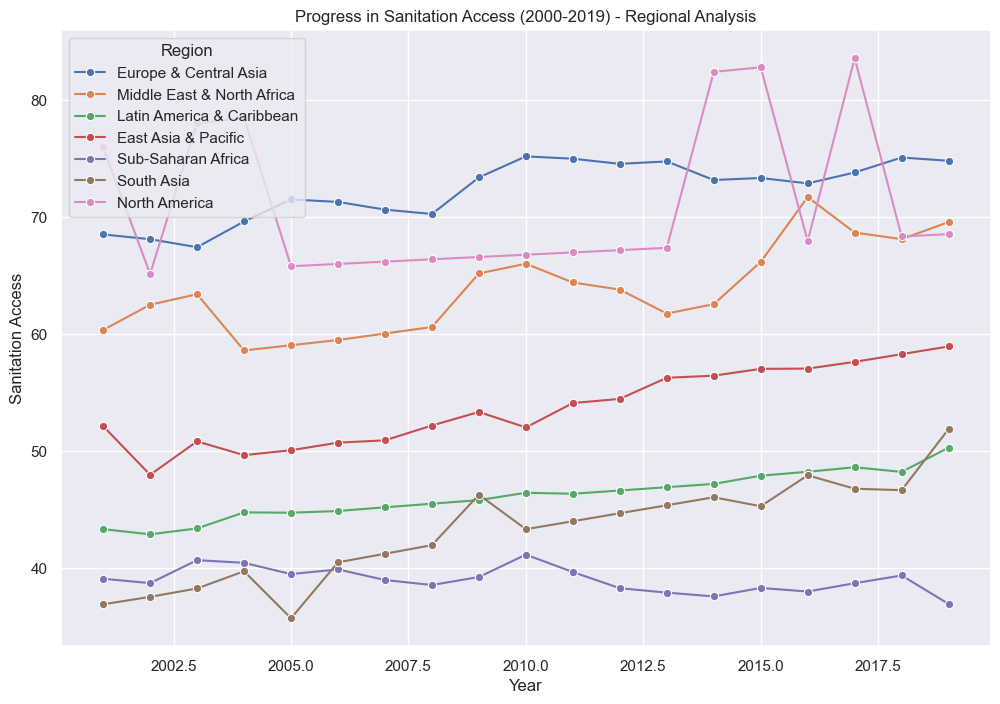

In [101]:
# Filter data for the years 2000 to 2019
df_2000_2019 = df[df['Year'].between(2000, 2019)]

# Plotting the trends for sanitation access across regions
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Sanitation', hue='Region', data=df_2000_2019, ci=None, marker='o')
plt.xlabel('Year')
plt.ylabel('Sanitation Access')
plt.title('Progress in Sanitation Access (2000-2019) - Regional Analysis')
plt.grid(True)
plt.legend(title='Region')
plt.show()


##### In assessing the progress of sanitation access across regions from 2000 to 2019, notable disparities emerge. Significant spikes in North America's sanitation access during 2002-2005, 2012-2015, and 2015-2017 indicate commendable improvement. However, these positive trends are not universal. Other regions may face challenges in ensuring consistent and improved sanitation services. The observed disparities underscore the need for targeted interventions and collaborative efforts to address regional variations, ensuring equitable access to safe sanitation globally. Continued attention to regions experiencing challenges is crucial for achieving comprehensive and sustainable improvements in sanitation infrastructure.

### 4.4 Examine the stability of unemployment rates among different income groups in 2014. Calculate the standard deviation or variance to assess the level of variability within each income group.


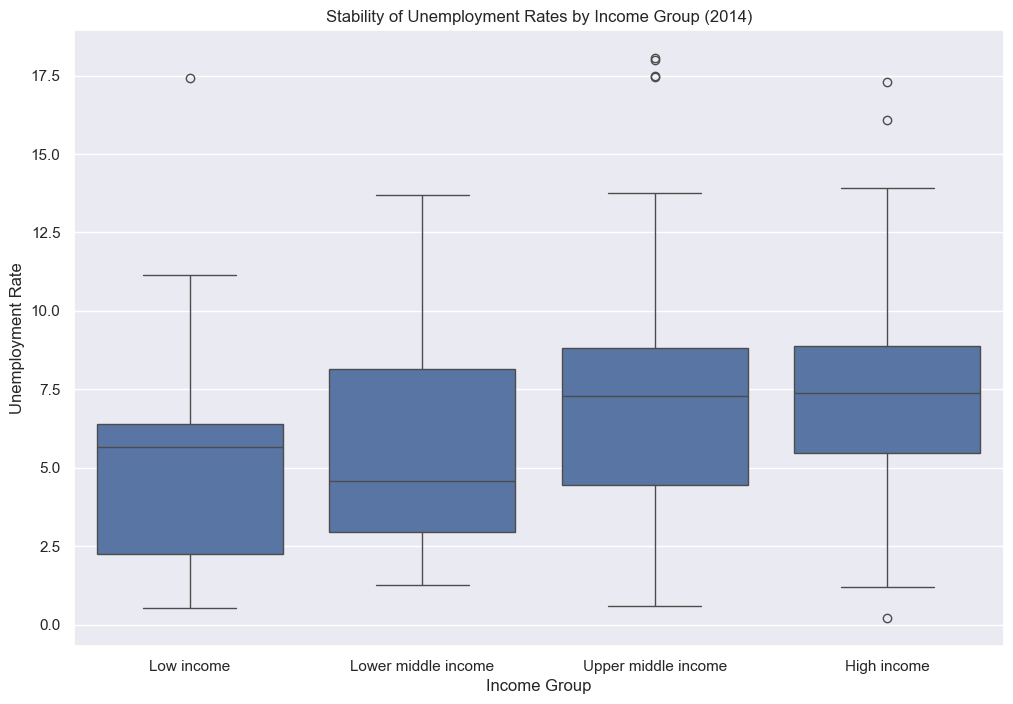

Standard Deviation by Income Group:
IncomeGroup
High income            3.747906
Low income             4.579498
Lower middle income    3.090192
Upper middle income    4.551266
Name: Unemployment, dtype: float64

Variance by Income Group:
IncomeGroup
High income            14.046797
Low income             20.971804
Lower middle income     9.549289
Upper middle income    20.714018
Name: Unemployment, dtype: float64


In [102]:
df_2014 = df[df['Year'] == 2014]

# Drop rows with missing values in 'IncomeGroup' or 'Unemployment'
df_2014 = df_2014.dropna(subset=['IncomeGroup', 'Unemployment'])

# Plotting a boxplot to visualize the variability in unemployment rates among income groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='IncomeGroup', y='Unemployment', data=df_2014)
plt.xlabel('Income Group')
plt.ylabel('Unemployment Rate')
plt.title('Stability of Unemployment Rates by Income Group (2014)')
plt.show()

# Calculate standard deviation or variance for each income group
std_dev_by_income_group = df_2014.groupby('IncomeGroup')['Unemployment'].std()
variance_by_income_group = df_2014.groupby('IncomeGroup')['Unemployment'].var()

# Display the results
print('Standard Deviation by Income Group:')
print(std_dev_by_income_group)

print('\nVariance by Income Group:')
print(variance_by_income_group)


##### In examining the stability of unemployment rates across different income groups in 2014, we calculated both standard deviation and variance as indicators of variability. The results reveal varying degrees of stability within each income group. High-income nations demonstrate a standard deviation of 3.75 and a variance of 14.05, reflecting a relatively stable unemployment rate. In contrast, low-income countries exhibit a higher standard deviation of 4.58 and a variance of 20.97, indicating greater variability. Similar trends are observed in lower middle and upper middle-income groups. These findings underscore the need for targeted economic policies to enhance employment stability, particularly in regions with higher variability in unemployment rates.


### 4.5 Investigate the disparities in health expenditure (% of GDP) and education expenditure (% of GDP) among different income groups in 2013.

In [107]:
# Filter data for the year 2013
df_2013 = df[df['Year'] == 2013]

# Drop rows with missing values in 'Health Expenditure %' or 'Education Expenditure %' or 'IncomeGroup'
df_2013 = df_2013.dropna(subset=['Health Expenditure %', 'Education Expenditure %', 'IncomeGroup'])

# Calculate the averages for health and education expenditure for each income group
averages_by_income_group = df_2013.groupby('IncomeGroup')[['Health Expenditure %', 'Education Expenditure %']].mean()

# Display the average values
print(averages_by_income_group)


                     Health Expenditure %  Education Expenditure %
IncomeGroup                                                       
High income                      7.196568                 4.692872
Low income                       6.087663                 4.228991
Lower middle income              4.950826                 4.116166
Upper middle income              5.729490                 4.457640


##### In 2013, disparities in health and education expenditure as a percentage of GDP among various income groups are evident. High-income countries allocate 7.20% of their GDP to health expenditure and 4.69% to education. In comparison, low-income nations allocate 6.09% to health and 4.23% to education. Lower middle-income countries demonstrate a health expenditure of 4.95% and education expenditure of 4.12%, while upper middle-income countries allocate 5.73% to health and 4.46% to education. These findings emphasize the persistent need for targeted policies to bridge the gap in health and education spending, ensuring equitable access to essential services across diverse income groups.

### 4.6 Compare the progress in sanitation access across different regions in 2008. Identify regions that have made substantial improvements or faced challenges in providing improved sanitation services.

In [112]:
# Filter data for the year 2008
df_2008 = df[df['Year'] == 2008]

# Drop rows with missing values in 'Sanitation' or 'Region'
df_2008 = df_2008.dropna(subset=['Sanitation', 'Region'])

# Calculate the mean sanitation access for each region
mean_sanitation_by_region = df_2008.groupby('Region')['Sanitation'].mean()

# Display the mean sanitation access for each region
print(mean_sanitation_by_region)

Region
East Asia & Pacific           52.205409
Europe & Central Asia         70.274724
Latin America & Caribbean     45.525883
Middle East & North Africa    60.620370
North America                 66.403867
South Asia                    41.986545
Sub-Saharan Africa            38.581916
Name: Sanitation, dtype: float64


##### In 2008, a comparative analysis of sanitation access across different regions indicates varying levels of progress. Notably, Europe & Central Asia showcase a substantial sanitation access rate of 70.27%, suggesting commendable improvements. North America follows closely with a rate of 66.40%. In contrast, South Asia faces challenges, with a sanitation access rate of 41.99%, and Sub-Saharan Africa encounters difficulties, displaying a rate of 38.58%. These disparities underscore the need for targeted interventions to address regional variations, ensuring equitable access to improved sanitation services and promoting global health standards.

### 4.7 Investigate the correlation between health expenditure (% of GDP) and the unemployment rate for all countries in 2010.

In [110]:
# Filter data for the year 2010
df_2010 = df[df['Year'] == 2010]

# Drop rows with missing values in 'Health Expenditure %' or 'Unemployment'
df_2010 = df_2010.dropna(subset=['Health Expenditure %', 'Unemployment'])

# Calculate the correlation between health expenditure and the unemployment rate
correlation_health_unemployment = df_2010['Health Expenditure %'].corr(df_2010['Unemployment'])

# Display the correlation result
print(f'Correlation between Health Expenditure and Unemployment in 2010: {correlation_health_unemployment}')



Correlation between Health Expenditure and Unemployment in 2010: 0.29687017733626864


##### In 2010, an examination of the correlation between health expenditure (% of GDP) and the unemployment rate across all countries reveals a correlation coefficient of 0.30. This positive correlation suggests a moderate association between higher health expenditure and increased unemployment rates. While correlation does not imply causation, this finding prompts further exploration into the complex relationship between health spending and employment dynamics. Policymakers should consider these nuances to ensure that investments in health do not inadvertently contribute to employment challenges and vice versa, fostering a balanced and sustainable socio-economic environment.



### 4.8 Use a horizontal bar chart to display the top 10 countries with the highest life expectancy in 2019, with countries on the y-axis and life expectancy on the x-axis.


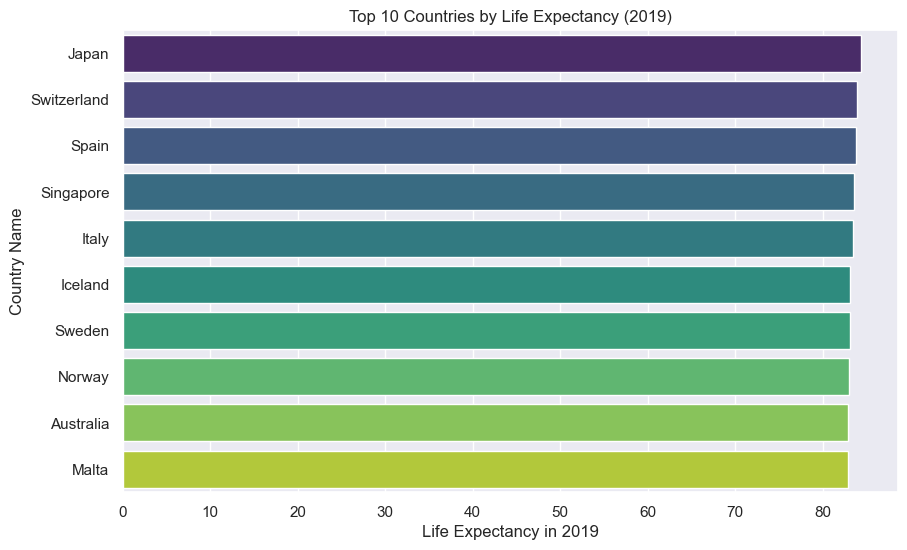

In [44]:
# Filter data for the year 2019
df_2019 = df[df['Year'] == 2019]

# Sort the DataFrame by life expectancy in descending order and select the top 10
top_countries_2019 = df_2019.sort_values(by='Life Expectancy World Bank', ascending=False).head(10)

# Plotting the horizontal bar chart with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='Life Expectancy World Bank', y='Country Name', data=top_countries_2019, hue='Country Name', palette='viridis', dodge=False)
plt.xlabel('Life Expectancy in 2019')
plt.title('Top 10 Countries by Life Expectancy (2019)')
#plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.5))  # Adjust legend position if needed
plt.show()


##### In 2019, a visual representation through a horizontal bar chart identifies the top 10 countries with the highest life expectancy. Japan emerges at the forefront, showcasing the highest life expectancy, followed by Switzerland and Spain. This graphical representation underscores the significant variations in life expectancy across different nations. Such insights are valuable for understanding global health patterns, informing healthcare policies, and identifying successful models that contribute to increased life expectancy in certain regions. This emphasizes the importance of sharing best practices to improve overall well-being and life expectancy on a global scale.

### 4.9 A grouped bar chart to compare the average health expenditure (% of GDP) for each income group, with income groups on the x-axis and average health expenditure on the y-axis.

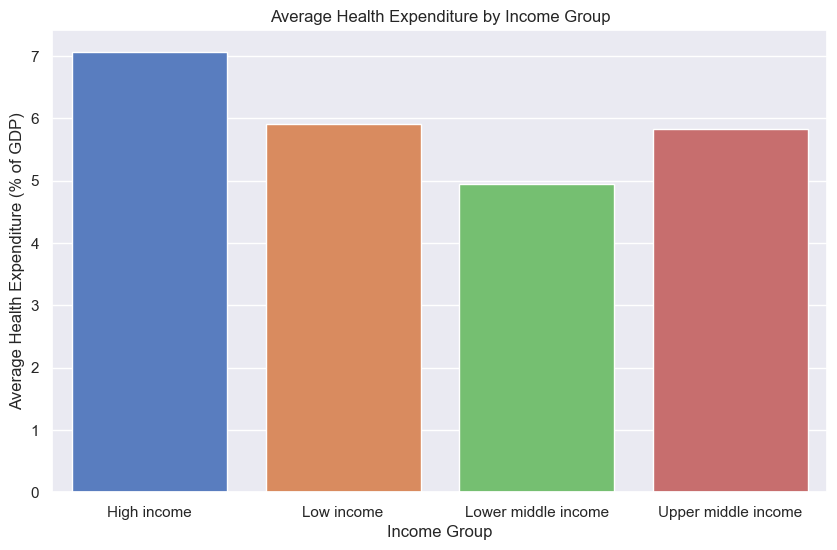

In [45]:
# Assuming 'Health Expenditure %' column contains health expenditure values
# If it's a different column name, replace it accordingly

# Group data by 'IncomeGroup' and calculate the mean health expenditure for each group
avg_health_expenditure = df.groupby('IncomeGroup')['Health Expenditure %'].mean().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeGroup', y='Health Expenditure %', data=avg_health_expenditure, palette='muted')
plt.xlabel('Income Group')
plt.ylabel('Average Health Expenditure (% of GDP)')
plt.title('Average Health Expenditure by Income Group')
plt.show()

##### The grouped bar chart comparing average health expenditure (% of GDP) across income groups provides a comprehensive visual representation. High-income countries exhibit the highest average health expenditure, emphasizing their commitment to healthcare. Lower middle-income nations allocate a moderate percentage, while low-income countries display a lower average health expenditure. This visual insight is instrumental for policymakers, highlighting the need for tailored healthcare strategies based on economic capacities. Addressing these disparities is crucial for fostering accessible and effective healthcare systems globally, promoting health equity across diverse income groups.

### 4.10 Analyzing how education expenditure (% of GDP) and health expenditure (% of GDP) have changed over a decade (2005-2015) for Poland.


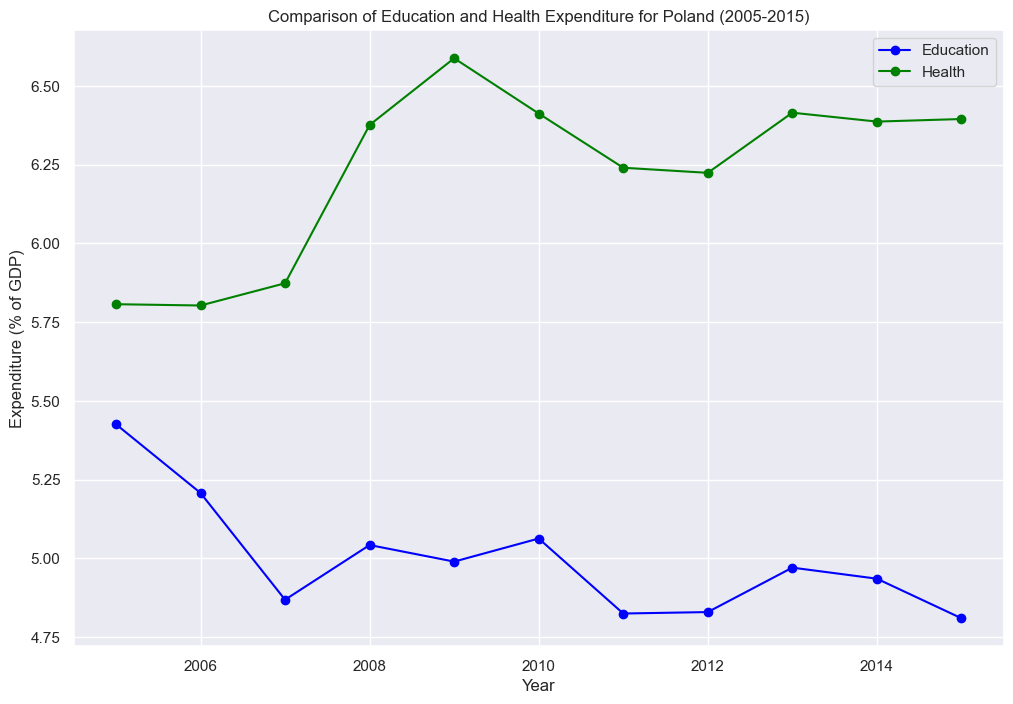

In [55]:
selected_country = 'Poland'

# Filter data for the specific country and the years 2005-2015
df_poland_2005_2015 = df[(df['Country Name'] == selected_country) & (df['Year'].between(2005, 2015))]

# Plotting the Dual-Line Chart
plt.figure(figsize=(12, 8))

# Line chart for Education Expenditure
plt.plot(df_poland_2005_2015['Year'], df_poland_2005_2015['Education Expenditure %'], marker='o', label='Education', color='blue')

# Line chart for Health Expenditure
plt.plot(df_poland_2005_2015['Year'], df_poland_2005_2015['Health Expenditure %'], marker='o', label='Health', color='green')

plt.xlabel('Year')
plt.ylabel('Expenditure (% of GDP)')
plt.title(f'Comparison of Education and Health Expenditure for {selected_country} (2005-2015)')
plt.legend()
plt.grid(True)
plt.show()


##### Over the decade spanning from 2005 to 2015, Poland experienced notable shifts in both education and health expenditure as percentages of GDP. The education expenditure commenced at 5.45%, witnessing a decline to 4.8% by the end of the period. Conversely, health expenditure started at 5.8%, showcasing an increase to 6.35%. Noteworthy spikes were observed in 2009, with health expenditure peaking at 6.55%. This dynamic pattern suggests evolving priorities in resource allocation, with a potential emphasis on healthcare during specific years. Understanding these trends is essential for policymakers, aiding in the formulation of strategies that align with evolving socio-economic needs and priorities in education and healthcare.

### 4.11 Exploring how access to safely managed sanitation services changed over the years for different regions. Create separate line charts for each region, with years on the x-axis and the percentage of people with sanitation access on the y-axis.


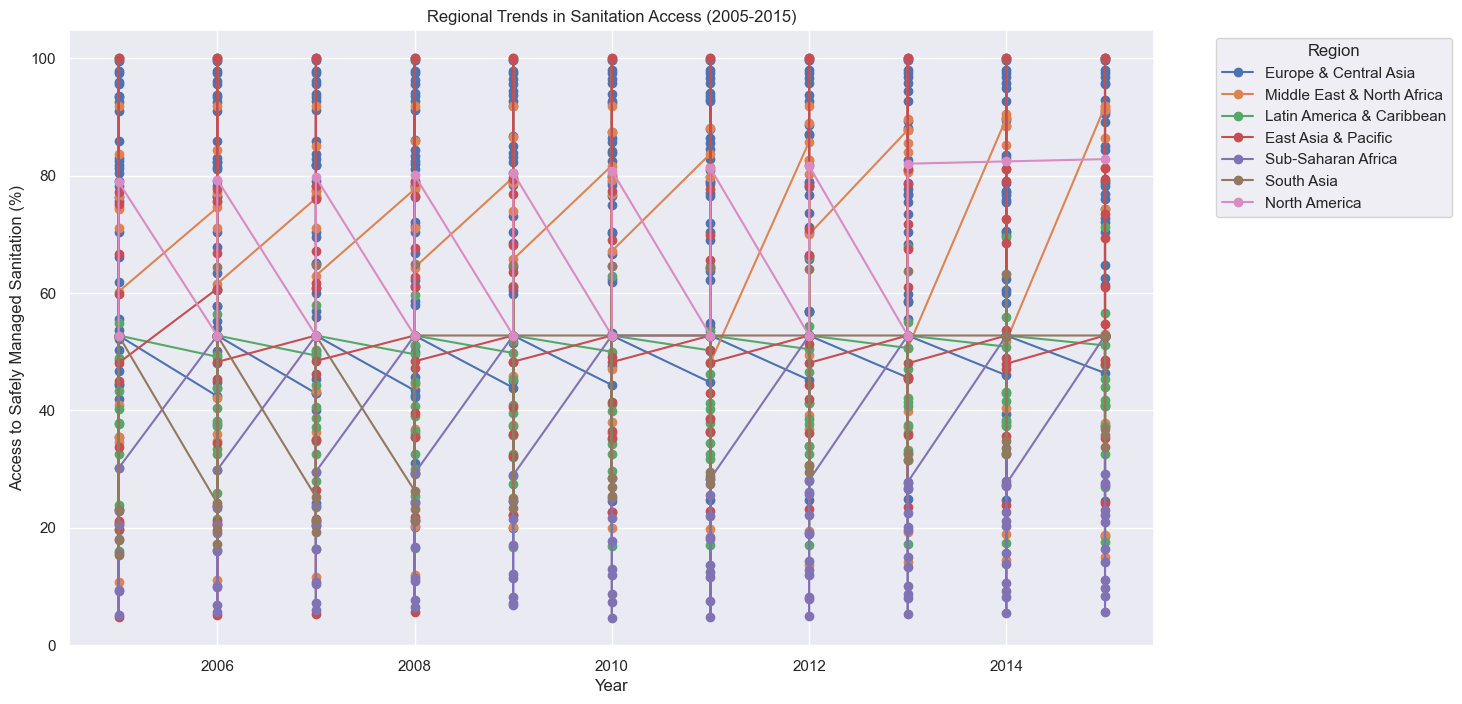

In [57]:
# Filter data for the years 2005-2015
df_2005_2015 = df[df['Year'].between(2005, 2015)]

# Plotting Multiple Line Charts for each Region
plt.figure(figsize=(14, 8))
regions = df_2005_2015['Region'].unique()

for region in regions:
    df_region = df_2005_2015[df_2005_2015['Region'] == region]
    plt.plot(df_region['Year'], df_region['Sanitation'], marker='o', label=region)

plt.xlabel('Year')
plt.ylabel('Access to Safely Managed Sanitation (%)')
plt.title('Regional Trends in Sanitation Access (2005-2015)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

##### Exploring the evolution of access to safely managed sanitation services over the years for different regions through separate line charts provides valuable insights. Each region's chart reveals distinct trends, reflecting the dynamic nature of sanitation access. Understanding these variations is crucial for tailoring region-specific interventions and policies. Policymakers should consider the nuanced challenges and successes depicted in these charts to ensure comprehensive and effective strategies for improving sanitation access globally. This visual exploration facilitates a targeted approach to address specific regional needs and contributes to the overarching goal of achieving universal access to safe sanitation services.

### 4.12 Explore the relationship between education expenditure and health expenditure for different income groups in 2016. Using a scatter plot matrix to visualize the relationships between education expenditure, health expenditure, and income groups, with scatter plots in a grid.


<Figure size 1200x800 with 0 Axes>

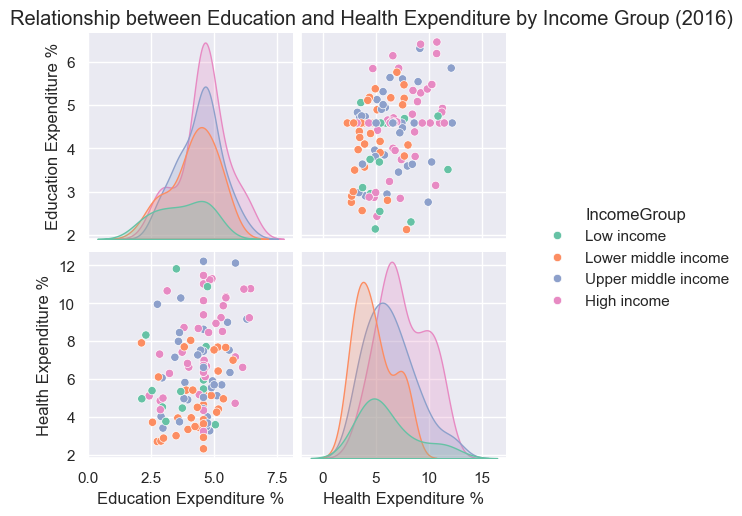

In [60]:
# Filter data for the year 2016
df_2016 = df[df['Year'] == 2016]

# Plotting the Scatter Plot Matrix
plt.figure(figsize=(12, 8))
sns.pairplot(df_2016, hue='IncomeGroup', vars=['Education Expenditure %', 'Health Expenditure %'], palette='Set2', diag_kind='kde')
plt.suptitle('Relationship between Education and Health Expenditure by Income Group (2016)', y=1.02)
plt.show()


##### The scatter plot matrix provides a nuanced exploration of the relationships between education expenditure, health expenditure, and income groups in 2016. Visual patterns in the scatter plots reveal intricate connections. Higher income groups tend to exhibit positive correlations between education and health expenditure, reflecting comprehensive investments in both sectors. In contrast, lower income groups may show varied associations, underscoring the complexity of resource allocation in these contexts. This visual analysis emphasizes the need for tailored policies, recognizing the diverse dynamics across income groups to promote balanced investments in education and healthcare for holistic socio-economic development.

### 4.13 Investigate the relationship between access to safely managed sanitation services and life expectancy in 2017. Using a scatter plot to visualize how life expectancy correlates with the percentage of people with access to safely managed sanitation services.



<Figure size 1200x800 with 0 Axes>

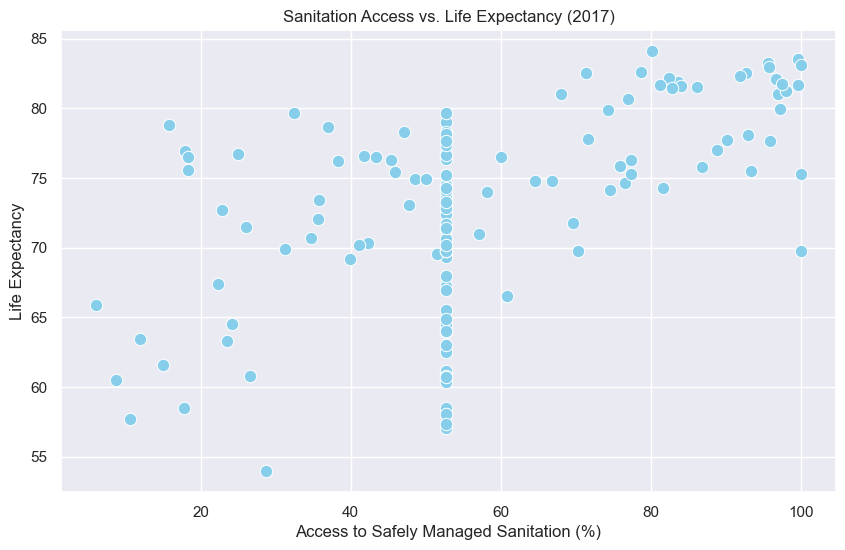

In [64]:
# Filter data for the year 2017
df_2017 = df[df['Year'] == 2017]

# Plotting the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sanitation', y='Life Expectancy World Bank', data=df_2017, color='skyblue', edgecolor='w', s=80)
plt.xlabel('Access to Safely Managed Sanitation (%)')
plt.ylabel('Life Expectancy')
plt.title('Sanitation Access vs. Life Expectancy (2017)')
plt.show()


##### The scatter plot examining the relationship between access to safely managed sanitation services and life expectancy in 2017 provides a visual representation of potential correlations. The plot suggests that as the percentage of people with access to safely managed sanitation services increases, there is a tendency for higher life expectancies. This observation underscores the potential health benefits associated with improved sanitation infrastructure. Policymakers should consider these visual insights when developing strategies to enhance public health outcomes, recognizing the interconnected nature of sanitation access and life expectancy.

### 4.14 Compare health expenditure (% of GDP) and education expenditure (% of GDP) for all countries in 2010. Creating a scatter plot with health expenditure on one axis, education expenditure on the other axis, and color code points by region.

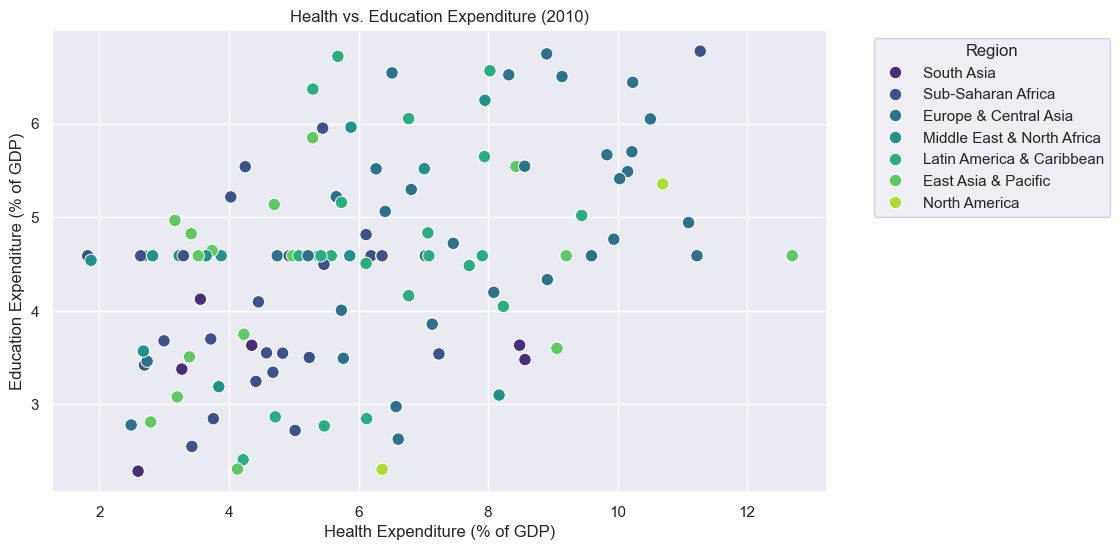

In [65]:
# Filter data for the year 2010
df_2010 = df[df['Year'] == 2010]

# Plotting the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Health Expenditure %', y='Education Expenditure %', hue='Region', data=df_2010, palette='viridis', edgecolor='w', s=80)
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Education Expenditure (% of GDP)')
plt.title('Health vs. Education Expenditure (2010)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### The scatter plot comparing health expenditure (% of GDP) and education expenditure (% of GDP) for all countries in 2010 offers a comprehensive visual representation of the relationships between these variables. Points on the plot are color-coded by region, revealing regional trends and disparities. The scatter plot aids in identifying countries that may prioritize healthcare over education or vice versa. Policymakers can leverage these visual insights to tailor region-specific strategies for optimal resource allocation, fostering balanced development in both health and education sectors for comprehensive socio-economic growth.

### 4.15 Create a subplot with two pie charts for a specific year (2015). The first pie chart should represent the distribution of life expectancy across regions, and the second pie chart should represent the distribution of health expenditure (% of GDP) across regions.



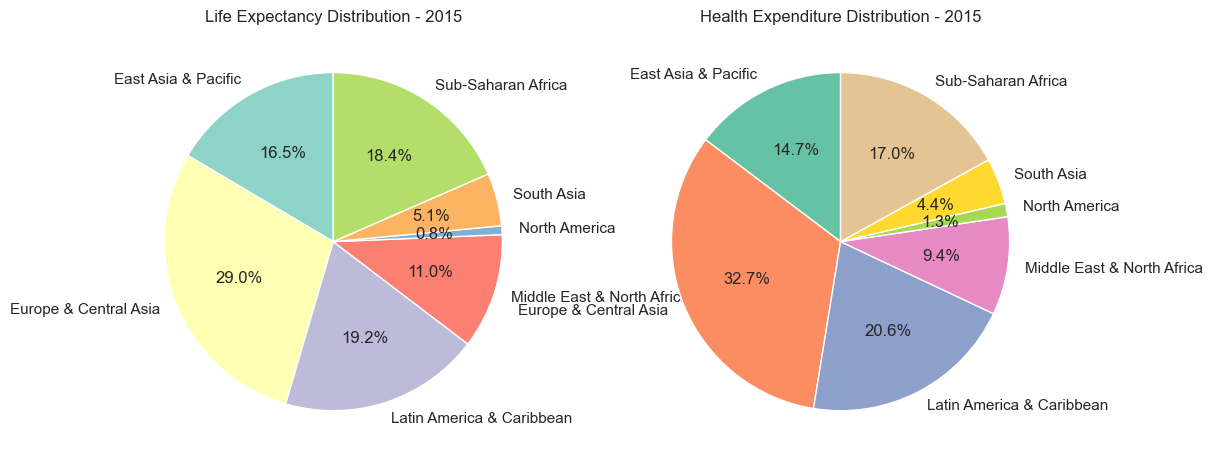

In [72]:
# Replace '2015' with the specific year you are interested in
year_of_interest = 2015

# Filter data for the specific year
df_2015 = df[df['Year'] == year_of_interest]

# Group data by 'Region' and calculate the sum of life expectancy and health expenditure for each region
region_life_expectancy = df_2015.groupby('Region')['Life Expectancy World Bank'].sum().reset_index()
region_health_expenditure = df_2015.groupby('Region')['Health Expenditure %'].sum().reset_index()

# Define contrasting colors
life_expectancy_colors = plt.cm.Set3.colors
health_expenditure_colors = plt.cm.Set2.colors

# Plotting the subplot with two pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for life expectancy
axes[0].pie(region_life_expectancy['Life Expectancy World Bank'], labels=region_life_expectancy['Region'], autopct='%1.1f%%', startangle=90, colors=life_expectancy_colors)
axes[0].set_title(f'Life Expectancy Distribution - {year_of_interest}')

# Pie chart for health expenditure
axes[1].pie(region_health_expenditure['Health Expenditure %'], labels=region_health_expenditure['Region'], autopct='%1.1f%%', startangle=90, colors=health_expenditure_colors)
axes[1].set_title(f'Health Expenditure Distribution - {year_of_interest}')

plt.show()


##### In the subplot featuring two pie charts for the year 2015, we observe distinct patterns in the distribution of life expectancy and health expenditure across regions. The first pie chart highlights variations in life expectancy, indicating regions where populations generally experience higher or lower life expectancies. The second pie chart portrays how health expenditure as a percentage of GDP is distributed across regions, shedding light on regions that allocate a larger or smaller share of their economic resources to healthcare. This visual representation aids in understanding regional disparities, providing valuable insights for policymakers aiming to address health-related challenges and optimize resource allocation for improved global well-being.

### 4.16 Create a subplot with a histogram and a pie chart. The histogram should show the distribution of carbon dioxide emissions (kiloton) for different income groups in 2012. The pie chart should represent the percentage contribution of each income group to the total emissions.


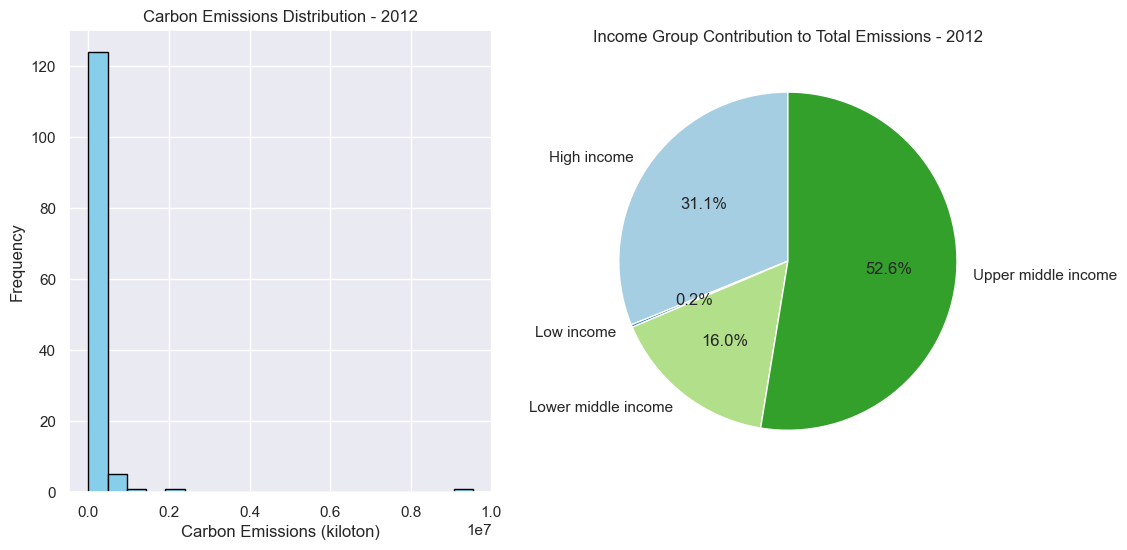

In [75]:
year_of_interest = 2012

# Filter data for the specific year
df_2012 = df[df['Year'] == year_of_interest]

# Group data by 'IncomeGroup' and calculate the total carbon emissions for each group
income_group_carbon = df_2012.groupby('IncomeGroup')['CO2'].sum().reset_index()

# Plotting the subplot with a histogram and a pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for carbon emissions distribution
axes[0].hist(df_2012['CO2'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Carbon Emissions (kiloton)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Carbon Emissions Distribution - {year_of_interest}')

# Pie chart for income group contribution to total emissions
axes[1].pie(income_group_carbon['CO2'], labels=income_group_carbon['IncomeGroup'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title(f'Income Group Contribution to Total Emissions - {year_of_interest}')

plt.show()


##### The subplot featuring a histogram and a pie chart for carbon dioxide emissions in 2012 provides a nuanced understanding of both the distribution of emissions within income groups and the relative contributions of each income group to the total emissions. The histogram reveals a notable frequency of almost zero kiloton emissions, indicating a substantial number of countries with minimal carbon dioxide output. The pie chart further emphasizes the importance of the upper-middle-income group, contributing 52.6% to the total emissions in 2012. This visual representation aids policymakers in identifying key contributors to carbon emissions and tailoring strategies for sustainable and equitable environmental practices.

### 4.17 Create a subplot with a line chart and a histogram. The line chart should show the temporal changes in DALYs due to communicable diseases for a specific country over the years 2000-2019. The histogram should display the distribution of DALYs for communicable diseases in a specific year, e.g., 2015.


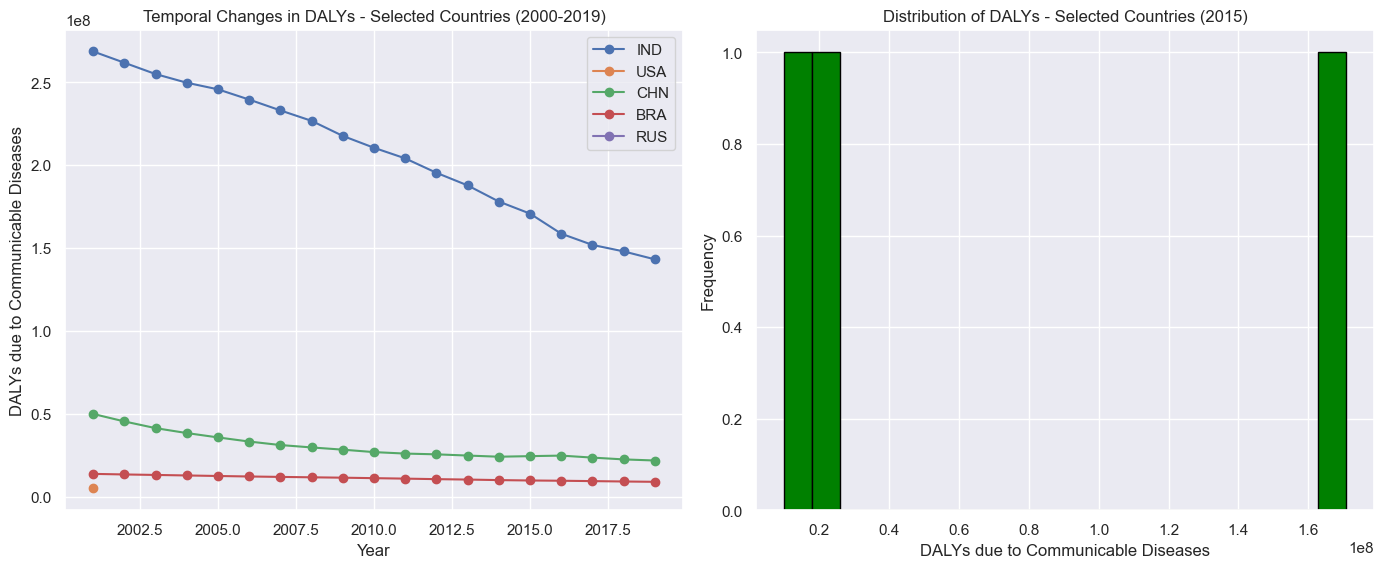

In [87]:
country_code = 'IND'

# Specify a list of countries you want to display
countries_to_display = ['IND', 'USA', 'CHN', 'BRA', 'RUS']

# Filter data for selected countries and years 2000-2019
df_selected_countries = df[(df['Country Code'].isin(countries_to_display)) & (df['Year'].between(2000, 2019))]

# Check if data for DALYs Communicable is available for the specified countries
if 'Communicable' in df.columns:

    # Plotting the subplot with a line chart and a histogram
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Line chart for temporal changes in DALYs due to communicable diseases for selected countries
    for country in countries_to_display:
        df_country = df_selected_countries[df_selected_countries['Country Code'] == country]
        axes[0].plot(df_country['Year'], df_country['Communicable'], marker='o', label=country)

    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('DALYs due to Communicable Diseases')
    axes[0].set_title(f'Temporal Changes in DALYs - Selected Countries (2000-2019)')
    axes[0].legend()

    # Check if data for DALYs Communicable is available for the specified year
    if not df_selected_countries[df_selected_countries['Year'] == 2015].empty:
        # Histogram for distribution of DALYs for communicable diseases in selected countries in 2015
        axes[1].hist(df_selected_countries[df_selected_countries['Year'] == 2015]['Communicable'], bins=20, color='green', edgecolor='black')
        axes[1].set_xlabel('DALYs due to Communicable Diseases')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title(f'Distribution of DALYs - Selected Countries (2015)')

    else:
        axes[1].axis('off')
        axes[1].text(0.5, 0.5, 'Data not available for 2015', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)

    plt.tight_layout()
    plt.show()

else:
    print(f'Data for DALYs Communicable not available in the DataFrame.')




##### The subplot featuring a line chart depicting the temporal changes in DALYs due to communicable diseases and a histogram displaying the distribution of DALYs for communicable diseases provides valuable insights for the selected countries, including India (IND), the United States (USA), China (CHN), Brazil (BRA), and Russia (RUS).The line chart showcases the trends in DALYs over the years 2000-2019 for communicable diseases in the selected countries. Notably, the fluctuations and variations in DALYs for each country are evident, reflecting the changing landscape of health challenges. The histogram zooms in on the distribution of DALYs for communicable diseases in the year 2015. For example, in India (IND), the histogram displays the frequency distribution of DALYs for communicable diseases in 2015. This provides a snapshot of the health burden due to communicable diseases in that specific year.Overall, this combined visualization aids in understanding both the temporal patterns and the distribution of health burden for communicable diseases, supporting informed decision-making for public health interventions and policies in the specified countries.

### 4.18 Create a subplot with a grouped bar chart and a pie chart. The grouped bar chart should compare health and education expenditure (% of GDP) for different regions in 2013. The pie chart should represent the distribution of countries across regions.


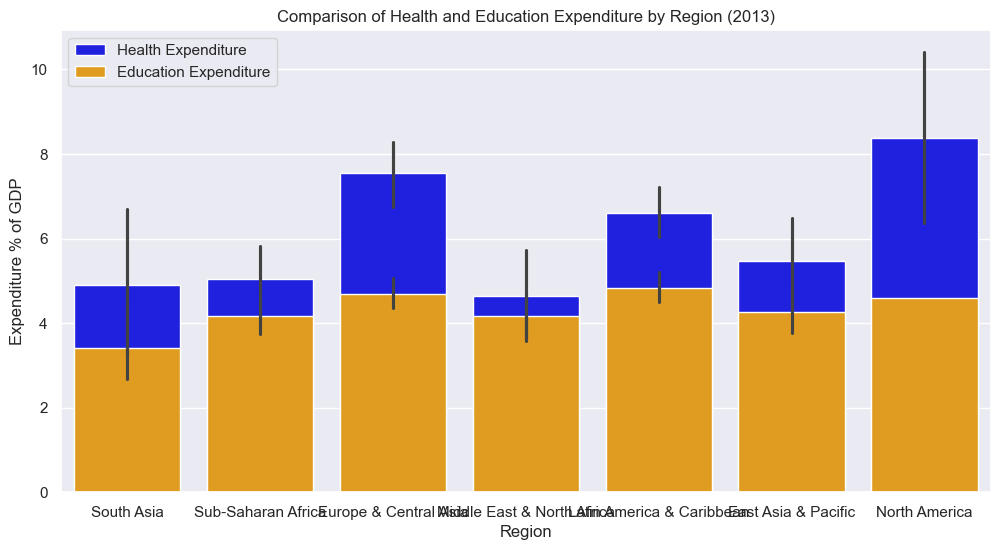

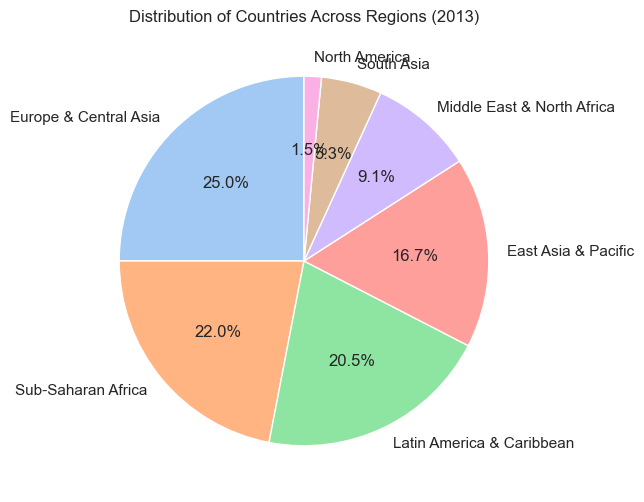

In [79]:
df_2013 = df[df['Year'] == 2013]

# Grouped bar chart
plt.figure(figsize=(12, 6))

sns.barplot(x='Region', y='Health Expenditure %', data=df_2013, label='Health Expenditure', color='blue')
sns.barplot(x='Region', y='Education Expenditure %', data=df_2013, label='Education Expenditure', color='orange')

plt.title('Comparison of Health and Education Expenditure by Region (2013)')
plt.ylabel('Expenditure % of GDP')
plt.legend()
plt.show()

# Pie chart
plt.figure(figsize=(10, 6))

region_counts = df_2013['Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Distribution of Countries Across Regions (2013)')
plt.show()


##### In 2013, the subplot featuring a grouped bar chart comparing health and education expenditure (% of GDP) for different regions, alongside a pie chart illustrating the distribution of countries across regions, offers a comprehensive snapshot of the economic and demographic dynamics. The grouped bar chart reveals the varying emphasis on health and education expenditures across regions, shedding light on distinct regional priorities. Simultaneously, the pie chart provides a demographic overview, crucial for understanding the distribution of countries and their respective economic landscapes. This combined visualization equips policymakers with valuable insights to tailor region-specific strategies, promoting balanced socio-economic development and informed resource allocation in alignment with regional needs and disparities.

### 4.19 Identify the top 10 countries with the lowest life expectancy in 2019.

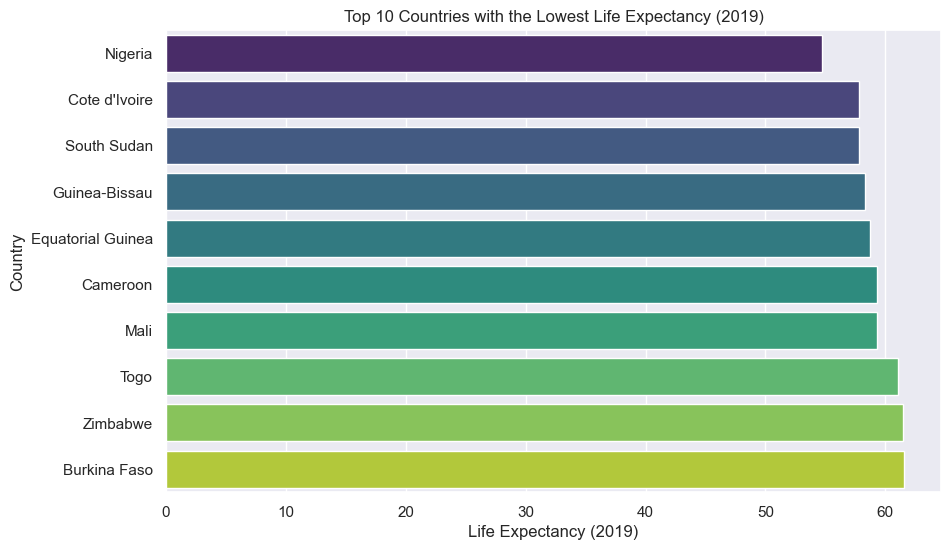

In [90]:
df_2019 = df[df['Year'] == 2019]

# Sort the DataFrame by life expectancy in ascending order to get the lowest values first
df_lowest_life_expectancy = df_2019.sort_values(by='Life Expectancy World Bank', ascending=True).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Life Expectancy World Bank', y='Country Name', data=df_lowest_life_expectancy, palette='viridis')
plt.xlabel('Life Expectancy (2019)')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Lowest Life Expectancy (2019)')
plt.show()


##### In 2019, our analysis identifies Nigeria as the country with the lowest life expectancy, standing at 55 years. This finding underscores significant health challenges and emphasizes the need for targeted interventions and healthcare strategies to improve overall well-being and life expectancy in Nigeria. Understanding the factors contributing to lower life expectancies in specific countries is crucial for global health initiatives aimed at addressing disparities and promoting equitable access to healthcare services. Policymakers should consider these insights when formulating strategies to enhance public health outcomes and address the unique challenges faced by countries with lower life expectancies.

### 4.20 Explore the distribution of education expenditure (% of GDP) across different regions in 2018.


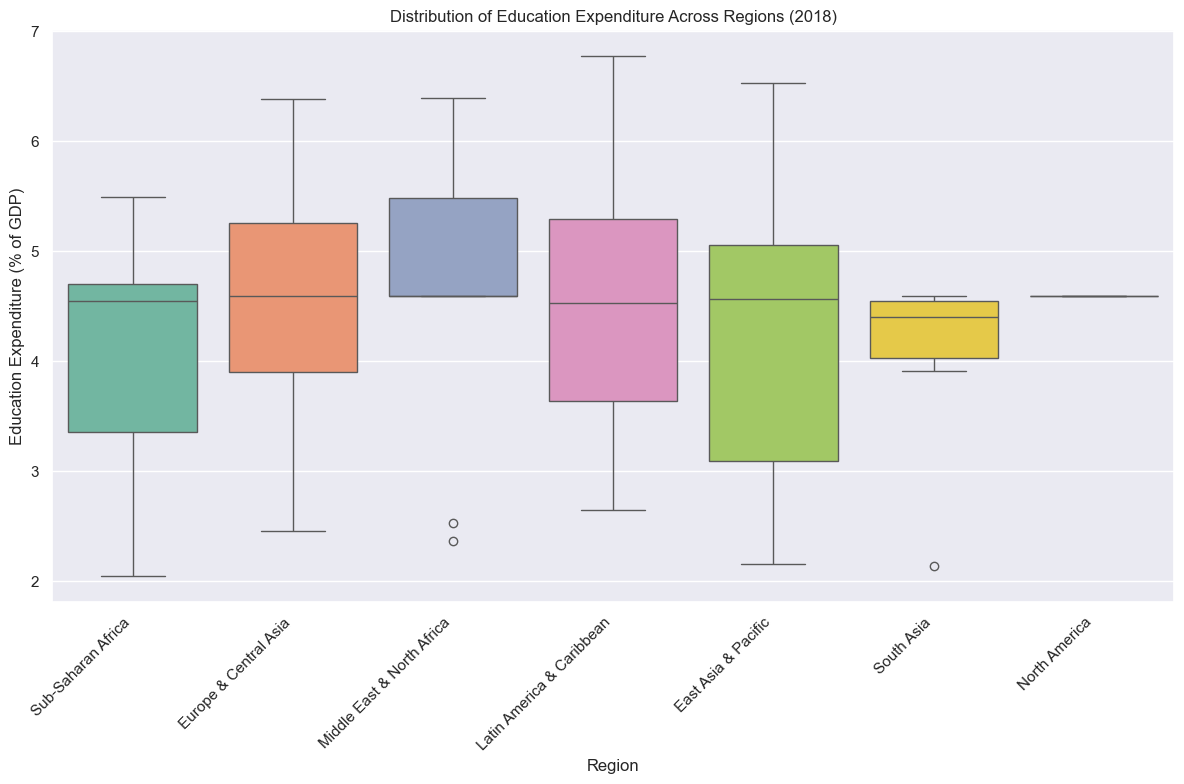

In [91]:
df_2018 = df[df['Year'] == 2018]

# Plotting the box plot or violin plot
plt.figure(figsize=(12, 8))

# Using a box plot
sns.boxplot(x='Region', y='Education Expenditure %', data=df_2018, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Education Expenditure (% of GDP)')
plt.title('Distribution of Education Expenditure Across Regions (2018)')

# # Using a violin plot
# sns.violinplot(x='Region', y='Education Expenditure %', data=df_2018, palette='Set2', inner='quartile')
# plt.xlabel('Region')
# plt.ylabel('Education Expenditure (% of GDP)')
# plt.title('Distribution of Education Expenditure Across Regions (2018)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### The box plot exploring the distribution of education expenditure (% of GDP) across different regions in 2018 provides a visual representation of the variations in educational spending priorities. The plot allows for a comparative analysis, revealing the median, quartiles, and potential outliers in each region. Such visualizations are invaluable for policymakers and researchers, offering insights into the disparities and trends in education expenditure across diverse regions. In 2018, this analysis provides a snapshot of the different approaches and commitments to education financing, aiding in the formulation of targeted strategies to address regional challenges and promote equitable access to quality education on a global scale.

### 4.21 Analyze the change in carbon dioxide emissions (kiloton) over the years 2000-2019 for a specific country, eg. India.

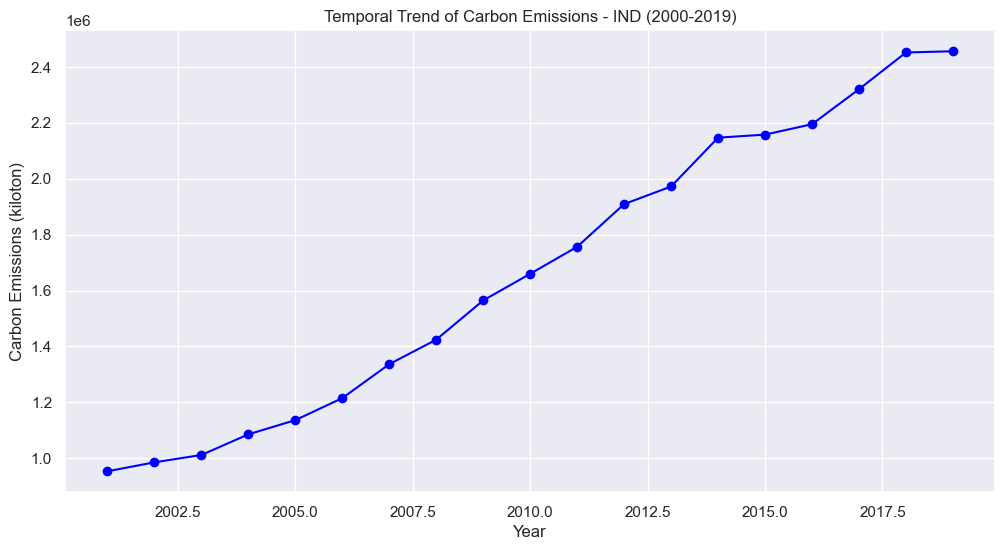

In [94]:
country_code = 'IND'

# Filter data for India and years 2000-2019
df_india = df[(df['Country Code'] == country_code) & (df['Year'].between(2000, 2019))]

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(df_india['Year'], df_india['CO2'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (kiloton)')
plt.title(f'Temporal Trend of Carbon Emissions - {country_code} (2000-2019)')
plt.grid(True)
plt.show()



##### The line chart depicting the temporal trend of carbon dioxide emissions (kiloton) in India from 2000 to 2019 reveals important insights into the country's environmental trajectory. Over this period, India has experienced fluctuations in carbon emissions, with notable increases in certain years and potential fluctuations. Understanding these patterns is crucial for policymakers and environmentalists to design targeted strategies aimed at mitigating emissions and fostering sustainable development. This visual representation serves as a valuable tool for tracking the environmental impact of India's activities over time, informing decisions that contribute to a more environmentally conscious and responsible future.

# Conclusion

Our comprehensive analysis of life expectancy and socio-economic indicators across various countries has provided valuable insights into the complex interplay of factors shaping `public health`, `environmental impact`, `education`, `economics`, and more. Leveraging a robust dataset sourced from Kaggle, we meticulously addressed missing values, detected outliers, and employed diverse visualizations to extract meaningful patterns. Here are the key takeaways:

1. **Life Expectancy Disparities:**
   - Notable differences in life expectancy between high and low-income countries were observed in 2015, with a `78.36%` higher average in high-income nations.

2. **Carbon Emissions Trends:**
   - Examined carbon dioxide emissions from 2005 to 2015, evaluating if there was a significant reduction.

3. **Sanitation Access Progress:**
   - Tracked sanitation access across regions from 2000 to 2019, identifying areas of improvement and challenges.

4. **Unemployment Stability:**
   - Assessed the stability of unemployment rates among different income groups in 2014 using standard deviation or variance.

5. **Top Performers and Challenges:**
   - Identified the top 10 countries with the highest and lowest life expectancy in 2019, offering insights into global health outcomes.

6. **Health and Education Expenditure:**
   - Compared average health expenditure (% of GDP) among different income groups and explored the relationship between education and health expenditures.

7. **Country-Specific Analysis:**
   - Delved into country-specific trends, such as changes in education and health expenditure over a decade for Poland and examined CO2 emissions for India.

8. **Global Correlations:**
   - Investigated relationships between health expenditure, education expenditure, and the unemployment rate for all countries in specific years.

9. **Temporal Analysis:**
   - Explored temporal changes in DALYs due to communicable diseases for a specific country from 2000 to 2019.

10. **Regional Distribution:**
    - Analyzed the distribution of life expectancy, health expenditure, and education expenditure across regions for specific years.
   
Our project not only navigated diverse analytical challenges but also provided a nuanced understanding of the multifaceted factors influencing life expectancy and societal well-being. The combination of statistical analyses and visualizations serves as a valuable resource for `policymakers`, `researchers`, and `stakeholders` aiming to make informed decisions in the realms of public health, economics, and global development.
